### Intro to Tensor Flow and Keras

Let’s start off by importing the classes and functions we intend to use to train our model.

In [1]:
import os
import sys
import time
import re
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

First we'll develop a small ANN with Keras:

In [3]:
# load pima indians dataset
dataset = numpy.loadtxt("../datasets/CSVs/pima-indians-diabetes.data", delimiter=",")

In [4]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [5]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

In [6]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=10, verbose=1)

Train on 514 samples, validate on 254 samples
Epoch 1/200
514/514 [==============================] - 1s 1ms/sample - loss: 0.6880 - accuracy: 0.6070 - val_loss: 0.6767 - val_accuracy: 0.6732
Epoch 2/200
514/514 [==============================] - 0s 119us/sample - loss: 0.6750 - accuracy: 0.6401 - val_loss: 0.6609 - val_accuracy: 0.6732
Epoch 3/200
514/514 [==============================] - 0s 120us/sample - loss: 0.6683 - accuracy: 0.6401 - val_loss: 0.6583 - val_accuracy: 0.6732
Epoch 4/200
514/514 [==============================] - 0s 120us/sample - loss: 0.6635 - accuracy: 0.6401 - val_loss: 0.6516 - val_accuracy: 0.6732
Epoch 5/200
514/514 [==============================] - 0s 127us/sample - loss: 0.6566 - accuracy: 0.6401 - val_loss: 0.6508 - val_accuracy: 0.6732
Epoch 6/200
514/514 [==============================] - 0s 121us/sample - loss: 0.6516 - accuracy: 0.6401 - val_loss: 0.6420 - val_accuracy: 0.6811
Epoch 7/200
514/514 [==============================] - 0s 138us/sample - l

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


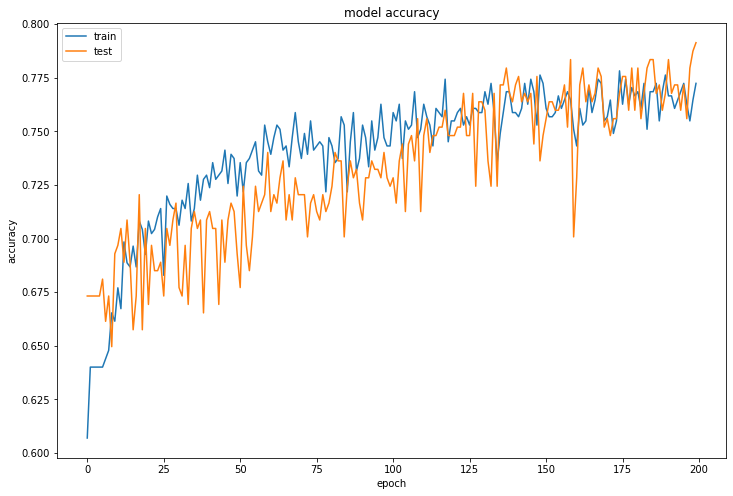

In [9]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

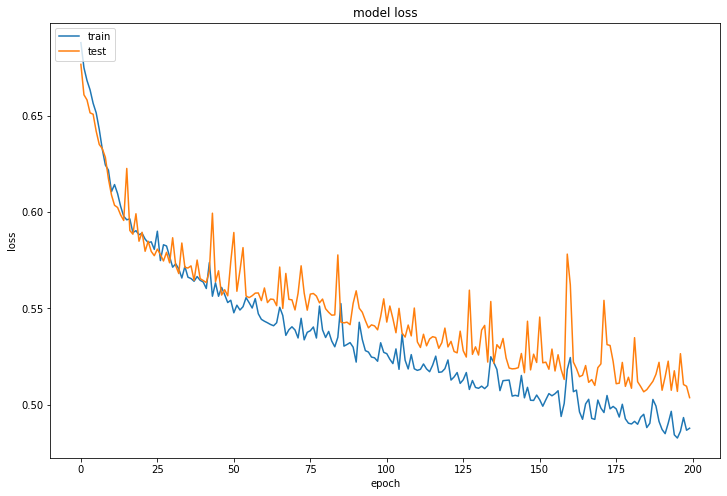

In [10]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

768/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
# calculate predictions
predictions = model.predict(X)
print(predictions[0:10])

print()

# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[0:10])

[[0.39267924]
 [0.12194932]
 [0.87369895]
 [0.10755393]
 [0.82307327]
 [0.28367224]
 [0.28361887]
 [0.63992524]
 [0.8902938 ]
 [0.18844143]]

[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
